In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp putils

In [ ]:
#| export
import numpy as np
import sys
import importlib
import json

In [ ]:
#| export
class SingletonObjects:
    "A utility for refrencing objects that should only be declared once."
    __instance = None
    @staticmethod 
    def getInstance():
        """ Static access method. """
        if SingletonObjects.__instance == None:
           SingletonObjects()
        return SingletonObjects.__instance

    def __init__(self):
        """ Virtually private constructor. """
        if SingletonObjects.__instance != None:
            raise Exception("This class is a singleton!")
        else:
            SingletonObjects.__instance = self
        self.objects = {}

    def clear(self):
        self.objects = {}
            
    def get_object(self, name=None):
        return self.objects[name]

    def add_object(self, key=None, value=None):
        if key in self.objects:
            raise Exception(f'Object {key} already exists in SingletonObjects.')            
        else:
            self.objects[key]=value


In [ ]:
#| export
class UniqueNamer:
    "A utility for ensuring the names of functions are unique."
    __instance = None
    @staticmethod 
    def getInstance():
        """ Static access method. """
        if UniqueNamer.__instance == None:
           UniqueNamer()
        return UniqueNamer.__instance

    def __init__(self):
        """ Virtually private constructor. """
        if UniqueNamer.__instance != None:
            raise Exception("This class is a singleton!")
        else:
            UniqueNamer.__instance = self
        self.names = {}

    def clear(self, namespace=None):
        if namespace==None:
            self.names = {}
        else:
            self.names[namespace] = {}

            
    def get_name(self, namespace=None, name=None):

        if namespace in self.names:
            namespace_list = self.names[namespace]
        else:
            namespace_list = {}
            self.names[namespace] = namespace_list

        if name in namespace_list: 
            num = namespace_list[name]+1
            namespace_list[name]=num
            name = f'{name}{num}'
        #else:
        namespace_list[name]=0
        return name
    
    def report(self,  namespace=None, name=None,):

        if namespace is None:
            for namespace, namespace_list in self.names.items():
                print(namespace, len(namespace_list))
                for name in namespace_list:
                    print("*** ", name)
        else:
            if namespace in self.names:
                namespace_list = self.names[namespace]
                if name == None:
                    print(len(namespace_list))
                    for nname in namespace_list:
                        print("*** ", nname, namespace_list[nname])
                else:
                    print("*** ", name, namespace_list[name])

In [ ]:
#| export
class FunctionsList:
    "A utility for storing functions created, keyed on the function name."
    __instance = None
    @staticmethod 
    def getInstance():
        """ Static access method. """
        if FunctionsList.__instance == None:
             FunctionsList()
        return FunctionsList.__instance
    def __init__(self):
        """ Virtually private constructor. """
        if FunctionsList.__instance != None:
             raise Exception("This class is a singleton!")
        else:
             FunctionsList.__instance = self
        self.functions = {}

    def clear(self, namespace=None):
        if namespace==None:
            self.functions = {}
        else:
            self.functions[namespace] = {}
    
    def add_function(self, namespace=None, func=None):
        if namespace in self.functions:
            namespace_list = self.functions[namespace]
        else:
            namespace_list = {}
            self.functions[namespace]=namespace_list

        name = func.get_name()
        namespace_list[name]=func
        
        return name

    def remove_function(self, namespace=None, name=None):
        if name in self.functions[namespace]:
            func = self.functions[namespace].pop(name)     
            
        if self.count(namespace)==0:
            self.functions.pop(namespace)
            
        return func
    
    def delete_function(self, namespace=None, name=None):
        func = self.remove_function(namespace=namespace, name=name)
        del func

    def get_function(self, namespace=None, name=None):     
        if  name is None:
            raise Exception(f'The function name must be specified')
        if  namespace is None:
            raise Exception(f'The namespace must be specified')
        
        if namespace in self.functions:
            namespace_list = self.functions[namespace]
        else:
            return name
        
        if isinstance(name, str) :
            if  name in namespace_list:
                func = namespace_list[name]
            else:
                raise Exception(f'Function {name} does not exist in namespace {namespace}')
        else:
            func = name

        return func
    
    def count(self, namespace=None):
        if namespace is None:
            return len(self.functions)
        
        if namespace in self.functions:
            namespace_list = self.functions[namespace]
            return len(namespace_list)
        else:
            raise Exception(f"Namespace {namespace} not found in report")
                
                
                
    def report(self, namespace=None, name=None):
        print("--- functions report")
        if namespace is None:
            for namespace, namespace_list in self.functions.items():
                print(len(namespace_list), 'NAMESPACE', namespace)
                for name, function in namespace_list.items():
                    print("*** ", name, [function])
                    print(function)
        else:   
            if namespace in self.functions:
                namespace_list = self.functions[namespace]
            else:
                raise Exception(f"Namespace {namespace} not found in report")

            if name == None:
                print(len(namespace_list), 'NAMESPACE', namespace)
                for name, function in namespace_list.items():
                    print("*** ", name, [function])
                    print(function)
            else:
                print("*** ", name, [namespace_list[name]])
                print(namespace_list[name])          
            

In [ ]:
from pct.functions import Proportional 

In [ ]:
prop = Proportional()

In [ ]:
UniqueNamer.getInstance().report()

In [ ]:
FunctionsList.getInstance().report()

--- functions report


In [ ]:
#| export
def dynamic_module_import(modulename, package=None):
    if modulename not in sys.modules:
        importlib.import_module(modulename, package)     

In [ ]:
#| export
def dynamic_class_load(modulename, classname):
    module = importlib.import_module(modulename) 
    my_class = getattr(module, classname)

In [ ]:
#import importlib
#importlib.import_module('pct.functions', 'Constant')   

In [ ]:
#| export
def get_drive():
    if os.name == 'nt':
        drive = os.path.abspath(os.sep)
    else:
        drive = os.path.abspath(os.sep)+'mnt'+os.sep+'c'+os.sep    
    return drive

In [ ]:
#| export
def loadjson(file):      
    with open(file) as f:
        rtn = json.load(f)
    return rtn

In [ ]:
var = loadjson("ws.json")
print(var)

{'type': 'WeightedSum', 'name': 'weighted_sum', 'value': 35, 'links': {'0': 'constant', '1': 'constant1', '2': 'constant2'}, 'weights': [1, 1, 1]}


In [ ]:
#| export
class Counter(object):

  def __init__(self, limit=1000, init=0, step=1, print=100, pause=False, display=10):
      self.limit=limit
      self.counter=init
      self.step=step
      self.print=print
      self.pause=pause
      self.display=display
      

  def __call__(self):
      self.counter+=self.step
      return self.counter
  
  def get(self):
      return self.counter
    
  def get_limit(self):
      return self.limit

  def set_limit(self, limit):
      self.limit=limit

In [ ]:
#| export
def stringIntListToListOfInts(strList, delimiter):
    #listRes = list(strList.split(","))
    #print(listRes)
    result = []
    for item in strList.strip('][').split(','):
        result.append(int(item))
    return result

In [ ]:
#| export
def stringFloatListToListOfFloats(strList, delimiter):
    #listRes = list(strList.split(","))
    #print(listRes)
    result = []
    for item in strList.strip('][').split(','):
        result.append(float(item))
    return result

In [ ]:
#| export
def stringListToListOfStrings(strList, delimiter=','):
    #listRes = list(strList.split(","))
    #print(listRes)
    result = []
    for item in strList.strip('][').split(delimiter):
        result.append(item.strip())
    return result

In [ ]:
#| export
def listNumsToString(list):
    str = ""
    for item in list:
        str += f'{item}'
    return str

In [ ]:
#| export
def round_lists(alist, formatted, places):    
    if isinstance(alist, str):
        raise Exception(f'Value {alist} should be a number in round_lists.')

    if isinstance(alist, float) or isinstance(alist, int):
        return round(alist,places)
    
    if isinstance(alist[0], float) or isinstance(alist[0], int):
        return [round(num,places) for num in alist]
    else:
        for item in alist:    
            rtd = round_lists(item, formatted, places)
            if rtd is not None:
                formatted.append(rtd)

In [ ]:
#| export
def floatListsToString(alist, places):
    flist = []    
    round_lists(alist,flist,places)
    return f'{flist}'

In [ ]:
#| export
def sigmoid(x, range, slope) :
    return -range / 2 + range / (1 + np.exp(-x * slope / range));

In [ ]:
#| export
def smooth(new_val, old_val, smooth_factor):
    return old_val * smooth_factor + new_val * (1-smooth_factor)

In [ ]:
#| export
def dot(inputs, weights):
    sum = 0
    for i in range(len(inputs)):
        sum += inputs[i]*weights[i]
    return sum

In [ ]:
#| export
def list_of_ones(num):
    x = [1 for _ in range(num) ]
    return x

In [ ]:
#| export
def limit_to_range(num, lower, upper):
    if num < lower:
        num = abs(num)

    if num > upper:
        num = num - upper
    return num

In [ ]:
print(list_of_ones(3))

[1, 1, 1]


In [ ]:
#| export
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay                 
                 controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    
def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [ ]:
import matplotlib.pyplot as plt

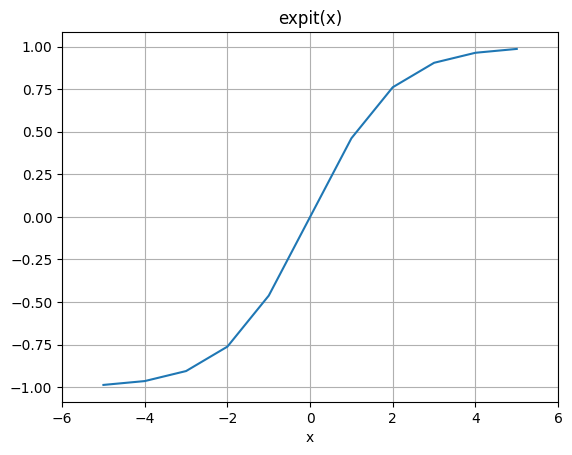

In [ ]:
x = np.linspace(-5, 5, 11)
range=2
scale=2
y = sigmoid(x, range, scale)
plt.plot(x, y)
plt.grid()
plt.xlim(-6, 6)
plt.xlabel('x')
plt.title('expit(x)')
plt.show()

In [ ]:
#| export
import os

In [ ]:
#| export
from pathlib import Path

def is_in_notebooks():
    term = os.getenv('TERM') 
    if term == 'xterm-color':
        return True
    
    return False

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()